# Diagrama de densidad

El diagrama de densidad nos permitirá conocer los cambios en la densidad, cuando cambiamos de una presión a otra. En el ejemplo iremos desde superfice a una profundidad de 100 bar(i.e. 1000 m). Se pueden comparar las anomalías de densidad entre estas dos profundidades.
Finalmente, encontraremos la salinidad del agua con una densidad $1020 Kg/m_{3}$ a 10 C y a 30 C presión atmosférica. Cuál es la densidad del agua que resulta de la mezcla de dos partes iguales de agua.
Requerimientos:
Incorporar el módulo GSW de python a su entorno de trabajo. Se puede obtener el módulo y una guía en el siguiente link:
https://fischcheng.github.io/2017/02/05/gibbs-seawater-oceanographic-package-for-python/


In [3]:
#Importamos los modulos que requerimos
import matplotlib.pyplot as plt
import numpy as np
import gsw #

Vamos a realizar un gráfico de contornos (i.e. niveles) de densidad para un rango de salinidad desde 0 a 36, y para un rango de temperaturas desde 5 a 35 C a una presión en superficie.
## Creamos un arreglo ('array')

In [4]:
x = np.linspace(0,36,50)#Será Temperatura
y = np.linspace(5,35,50)#Sera Salinidad
(X,Y) = np.meshgrid(x,y)

Calculamos y graficamos

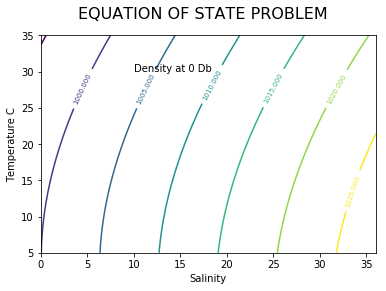

In [5]:
do = gsw.rho(X, Y,0)
#plt.subplot(2,2,1)
c = plt.contour(X,Y,do)
lx = plt.xlabel("Salinity")
ly = plt.ylabel("Temperature C")
plt.suptitle('EQUATION OF STATE PROBLEM', fontsize=16)
plt.text(10,30,'Density at 0 Db')
plt.clabel(c,inline=1, fontsize=7)
plt.show()